## Import Required Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the dataset
file_path = 'Amazon Customer Behavior Survey.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                                   Yes  Few times a month   

  Product_Search_Method Search_Result_Exploration  \
0               Keyword            Multiple pages   
1               Keyword            Multiple pages   
2               Keyword            Multiple pages   
3               Keyword                First page   
4                Filter            Multiple pages   

   Customer_Reviews_Importance  ... Saveforlater_Frequency Review_Left  \
0                            1  ...              Sometimes         Yes   
1                            1  ...                 Rarely          No   
2                            2  ...                 Rarely          No   
3                            5  ...              Sometimes         Yes   
4                            1  ...                 Rarely          No   

  Review_Reliability Review_Helpfulness  \
0       Occasionally                Yes   
1            Heavily                Yes   
2       Occasionally                 No   
3            Heavily                Yes   
4            Heavily                Yes   

  Personalized_Recommendation_Frequency  Recommendation_Helpfulness  \
0                                      2                        Yes   
1                                      2                  Sometimes   
2                                      4                         No   
3                                      3                  Sometimes   
4                                      4                        Yes   

  Rating_Accuracy   Shopping_Satisfaction    Service_Appreciation  \
0                1                      1      Competitive prices   
1                3                      2  Wide product selection   
2                3                      3      Competitive prices   
3                3                      4      Competitive prices   
4                2                      2      Competitive prices   

              Improvement_Areas  
0      Reducing packaging waste  
1      Reducing packaging waste  
2  Product quality and accuracy  
3  Product quality and accuracy  
4  Product quality and accuracy  

[5 rows x 23 columns]

## Data Preprocessing and EDA

In [4]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [5]:
# Summary statistics of the numerical features
print(data.describe())

              age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max          

In [6]:
# Check for missing values
print(data.isnull().sum())

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

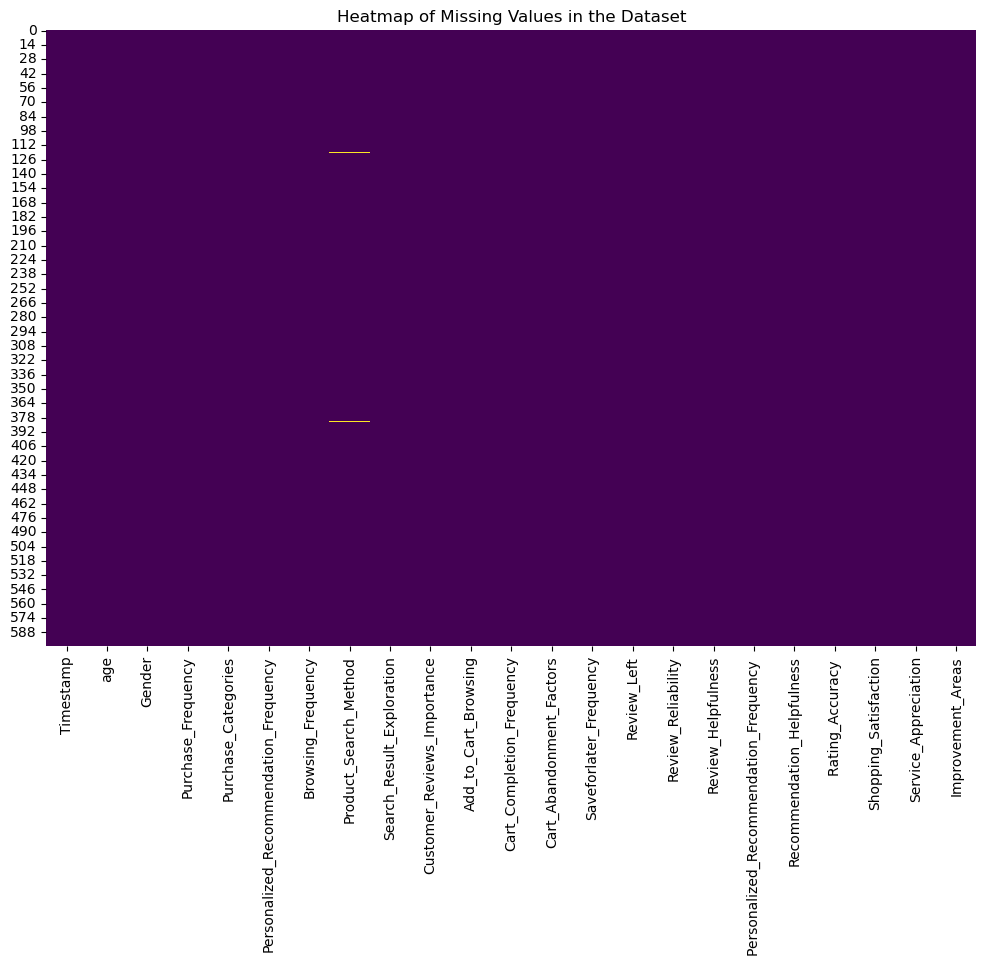

In [7]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()

* The Product_Search_Method column consist of 2 missing values, prompting a data cleaning technique. This would be done in subsequent cells.

C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

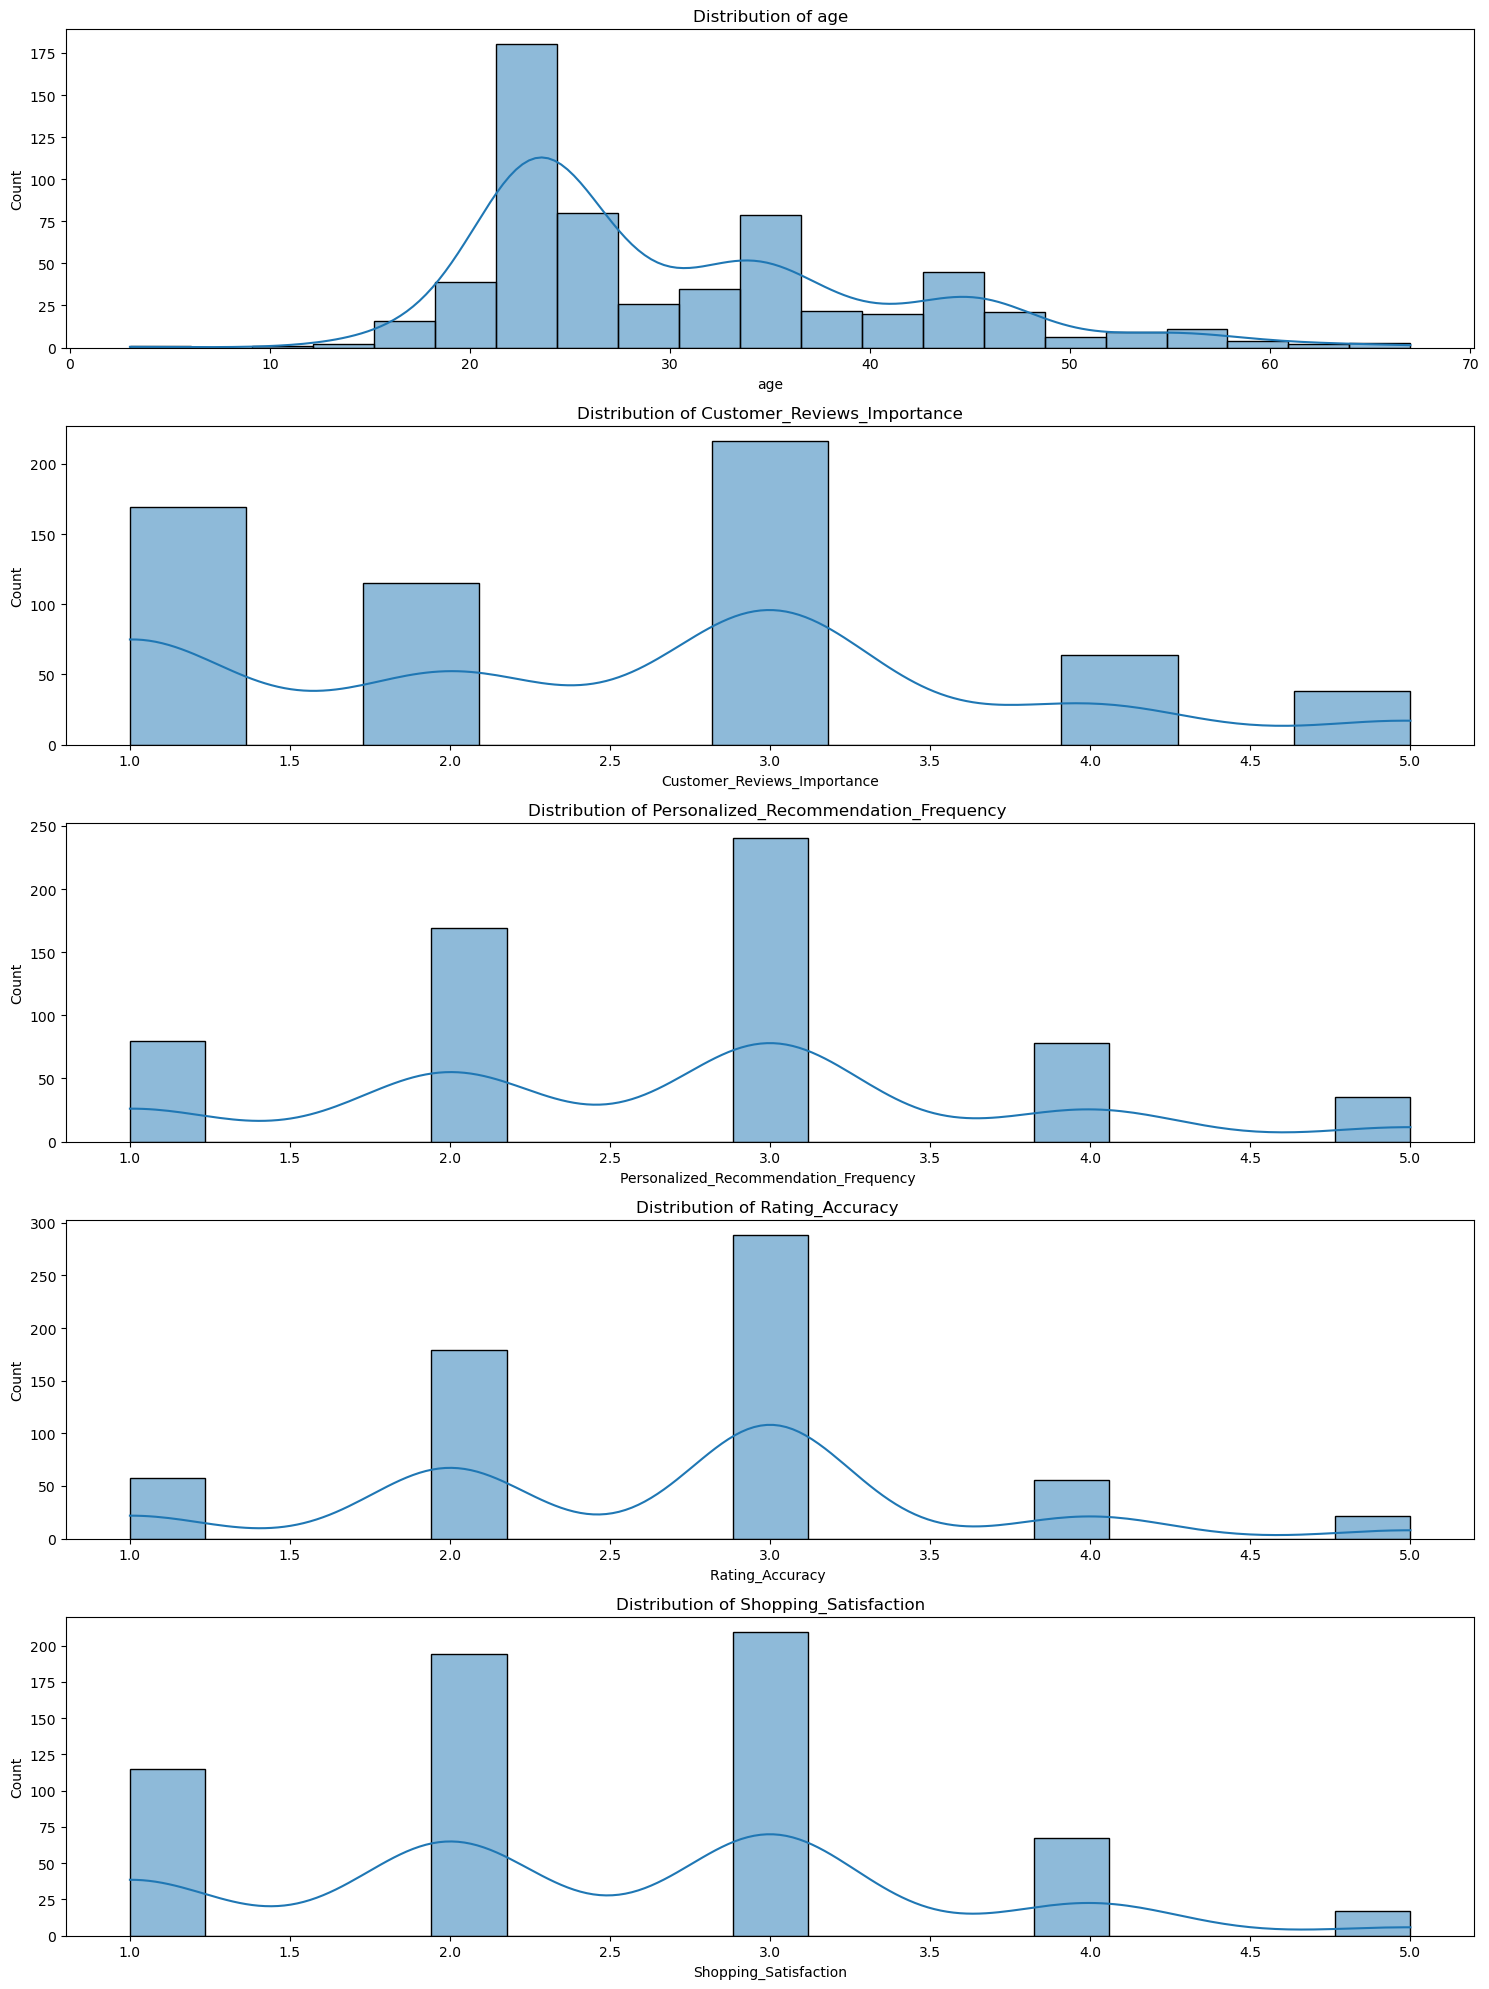

In [8]:
# Visualize the distribution of numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

* Based on the visualizations, It can be noted that the age profiles of Amazon customers are within the range of 20-26 years of age.
* Also, it is importance to notice that the shopping satifaction is majorly 2-3 stars. Therefore, it is important to take action to rectify this problem by optimizing Amazon's website for better ratings and satisfaction.

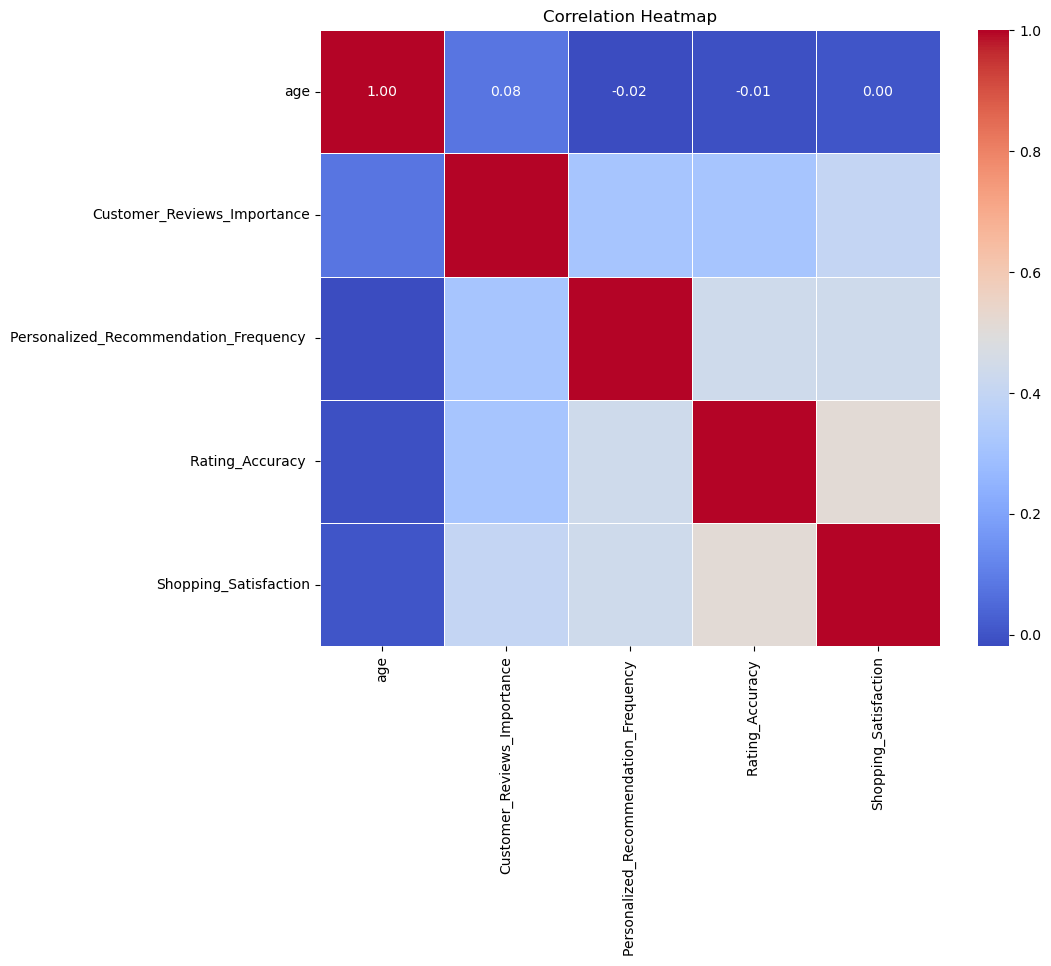

In [9]:
# Correlation heatmap with annotations
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# Handle missing values in 'Product_Search_Method' and other relevant columns
columns_with_missing_values = ['Product_Search_Method'] 
imputer = SimpleImputer(strategy='most_frequent')
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])

In [29]:
# Convert categorical variables to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [30]:
data.head()

Timestamp  age  Gender  Purchase_Frequency  Purchase_Categories  \
0          9   23       0                   0                    0   
1         10   23       0                   3                    8   
2         11   24       3                   0                   20   
3         12   24       0                   3                    4   
4         13   22       0                   1                    1   

   Personalized_Recommendation_Frequency  Browsing_Frequency  \
0                                      2                   1   
1                                      2                   0   
2                                      0                   0   
3                                      1                   0   
4                                      2                   0   

   Product_Search_Method  Search_Result_Exploration  \
0                      1                          1   
1                      1                          1   
2                      1                          1   
3                      1                          0   
4                      0                          1   

   Customer_Reviews_Importance  ...  Saveforlater_Frequency  Review_Left  \
0                            1  ...                       4            1   
1                            1  ...                       3            0   
2                            2  ...                       3            0   
3                            5  ...                       4            1   
4                            1  ...                       3            0   

   Review_Reliability  Review_Helpfulness  \
0                   3                   2   
1                   0                   2   
2                   3                   0   
3                   0                   2   
4                   0                   2   

   Personalized_Recommendation_Frequency   Recommendation_Helpfulness  \
0                                       2                           2   
1                                       2                           1   
2                                       4                           0   
3                                       3                           1   
4                                       4                           2   

   Rating_Accuracy   Shopping_Satisfaction  Service_Appreciation  \
0                 1                      1                     2   
1                 3                      2                     8   
2                 3                      3                     2   
3                 3                      4                     2   
4                 2                      2                     2   

   Improvement_Areas  
0                 11  
1                 11  
2                  9  
3                  9  
4                  9  

[5 rows x 23 columns]

* In order to get a better model results, removing unneccessary columns is paramount

In [31]:
# Remove unnecessary columns
# List of columns to remove
columns_to_remove = [
    'Timestamp', 
    'Gender', 
    'Review_Left', 
    'age', 
    'Improvement_Areas', 
    'Service_Appreciation', 
    'Browsing_Frequency', 
    'Product_Search_Method',
    'Review_Reliability', 
    'Review_Helpfulness',
    'Search_Result_Exploration', 
    'Recommendation_Helpfulness', 
    'Add_to_Cart_Browsing', 
    'Customer_Reviews_Importance',
    'Service_Appreciation',
    'Improvement_Areas'
]


# Drop the columns from the DataFrame
data_cleaned = data.drop(columns=columns_to_remove)

# Display the cleaned DataFrame
data_cleaned.head()

Purchase_Frequency  Purchase_Categories  \
0                   0                    0   
1                   3                    8   
2                   0                   20   
3                   3                    4   
4                   1                    1   

   Personalized_Recommendation_Frequency  Cart_Completion_Frequency  \
0                                      2                          4   
1                                      2                          2   
2                                      0                          4   
3                                      1                          4   
4                                      2                          4   

   Cart_Abandonment_Factors  Saveforlater_Frequency  \
0                         1                       4   
1                         2                       3   
2                         1                       3   
3                         1                       4   
4                         2                       3   

   Personalized_Recommendation_Frequency   Rating_Accuracy   \
0                                       2                 1   
1                                       2                 3   
2                                       4                 3   
3                                       3                 3   
4                                       4                 2   

   Shopping_Satisfaction  
0                      1  
1                      2  
2                      3  
3                      4  
4                      2

## Feature Engineering

In [32]:
# Create a new feature combining 'Rating_Accuracy' and 'Shopping_Satisfaction'
data_cleaned['Satisfaction_Score'] = data_cleaned['Rating_Accuracy '] * data_cleaned['Shopping_Satisfaction']

In [35]:
# Normalize the remaining numerical data using StandardScaler
scaler = StandardScaler()
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Display the first few rows of the cleaned and scaled DataFrame
data_cleaned.head()

Purchase_Frequency  Purchase_Categories  \
0                   0                    0   
1                   3                    8   
2                   0                   20   
3                   3                    4   
4                   1                    1   

   Personalized_Recommendation_Frequency  Cart_Completion_Frequency  \
0                                      2                          4   
1                                      2                          2   
2                                      0                          4   
3                                      1                          4   
4                                      2                          4   

   Cart_Abandonment_Factors  Saveforlater_Frequency  \
0                         1                       4   
1                         2                       3   
2                         1                       3   
3                         1                       4   
4                         2                       3   

   Personalized_Recommendation_Frequency   Rating_Accuracy   \
0                               -0.671687         -1.860694   
1                               -0.671687          0.364009   
2                                1.249242          0.364009   
3                                0.288778          0.364009   
4                                1.249242         -0.748343   

   Shopping_Satisfaction  Satisfaction_Score  
0              -1.447087           -1.319845  
1              -0.458271           -0.229333  
2               0.530544            0.424973  
3               1.519359            1.079280  
4              -0.458271           -0.665538

## Dimensionality Reduction

In [36]:
# Dimensionality Reduction
# Apply PCA to reduce dimensions before clustering
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
data_pca = pca.fit_transform(data_cleaned[numerical_columns])


## K-Means Clustering

In [37]:
# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

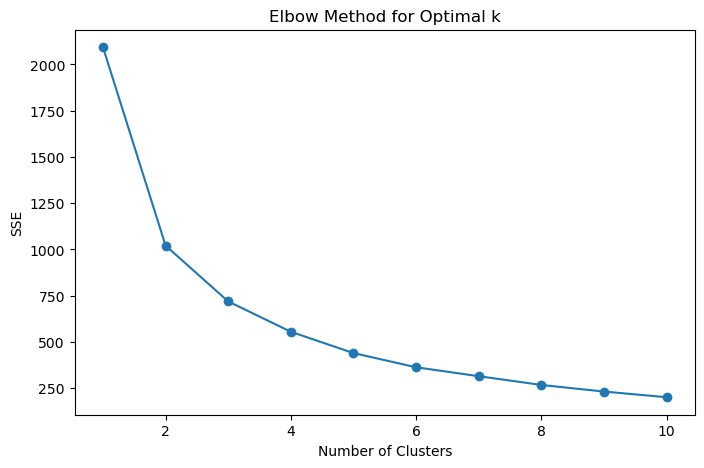

In [38]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [39]:
# Based on the elbow method, select the optimal k (e.g., k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_pca)

C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## Evaluate Clusters

In [40]:
# Calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(data_pca, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4092870753937418


C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


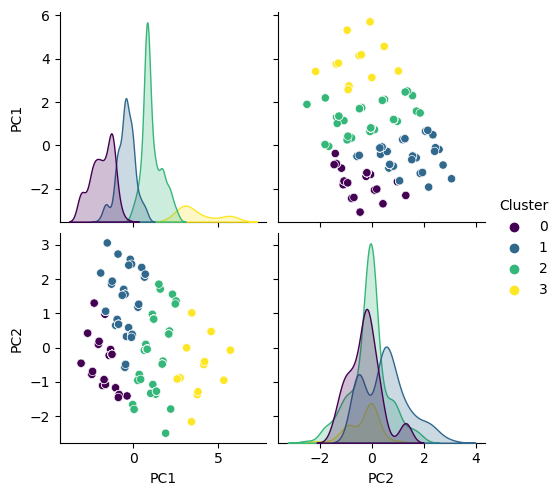

In [41]:
# Generate a pair plot to visualize clusters
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca_df['Cluster'] = data['Cluster']
sns.pairplot(data_pca_df, hue='Cluster', palette='viridis')
plt.show()

In [42]:
# Step 7: Cluster Interpretation and Labeling

# Analyze the cluster centroids to understand the customer segments
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])
centroids['Cluster'] = range(optimal_k)
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
         PC1       PC2  Cluster
0 -1.855037 -0.299506        0
1 -0.452716  0.526846        1
2  1.062469 -0.122429        2
3  3.750358 -0.324672        3


In [43]:
# Define meaningful labels for the clusters based on the centroids
cluster_labels = {
    0: 'High Satisfaction, Frequent Buyers',
    1: 'Low Satisfaction, Infrequent Buyers',
    2: 'Moderate Satisfaction, Average Buyers',
    3: 'High Satisfaction, Explorative Buyers'
}


# Map the cluster numbers to labels
data['Cluster_Label'] = data['Cluster'].map(cluster_labels)

# Display the final dataset with clusters and their labels
print(data[['Cluster', 'Cluster_Label']].head())


   Cluster                          Cluster_Label
0        0     High Satisfaction, Frequent Buyers
1        1    Low Satisfaction, Infrequent Buyers
2        2  Moderate Satisfaction, Average Buyers
3        2  Moderate Satisfaction, Average Buyers
4        1    Low Satisfaction, Infrequent Buyers


In [46]:
# Saving the cleaned and scaled dataset to a CSV file locally
file_path = 'Finalized_Amazon_Customer_Behavior.csv'
data_cleaned.to_csv(file_path, index=False)

print(f"The cleaned and scaled dataset has been saved as '{file_path}'.")


The cleaned and scaled dataset has been saved as 'Finalized_Amazon_Customer_Behavior.csv'.
